# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
import os

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #ignore tf warnings

In [3]:
#read csv file
data = pd.read_csv('ionosphere_data.csv')
data.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [5]:
#find missing values or nan
data.isna().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [6]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#droping feature2 as it has no values at all
data.drop(columns='feature2', inplace=True)
data.head(2)

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.0,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.0,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b


In [8]:
#split data into input and target variables
X_data = data.iloc[:,:-1].astype('float32')
y_data = data.iloc[:,-1]
print(X_data.head(2))
print(y_data)

   feature1  feature3  feature4  feature5  feature6  feature7  feature8  \
0       1.0   0.99539  -0.05889   0.85243   0.02306   0.83398  -0.37708   
1       1.0   1.00000  -0.18829   0.93035  -0.36156  -0.10868  -0.93597   

   feature9  feature10  feature11  ...  feature25  feature26  feature27  \
0       1.0    0.03760    0.85243  ...    0.56811   -0.51171    0.41078   
1       1.0   -0.04549    0.50874  ...   -0.20332   -0.26569   -0.20468   

   feature28  feature29  feature30  feature31  feature32  feature33  feature34  
0   -0.46168    0.21266   -0.34090    0.42267   -0.54487    0.18641   -0.45300  
1   -0.18401   -0.19040   -0.11593   -0.16626   -0.06288   -0.13738   -0.02447  

[2 rows x 33 columns]
0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: label, Length: 351, dtype: object


In [9]:
#standardizing the input data
sc = StandardScaler()
X_data = sc.fit_transform(X_data) 
(X_data)

array([[ 0.3484333 ,  0.71237236, -0.23425724, ..., -1.055054  ,
        -0.3122206 , -0.99959487],
       [ 0.3484333 ,  0.72164804, -0.52781075, ..., -0.11521329,
        -0.9326051 , -0.08328553],
       [ 0.3484333 ,  0.72164804, -0.17699842, ..., -0.4640925 ,
         0.40444332, -0.8485908 ],
       ...,
       [ 0.3484333 ,  0.615028  , -0.10143222, ...,  0.01601616,
         1.1066989 , -0.04330004],
       [ 0.3484333 ,  0.5326737 , -0.13825117, ..., -0.06586087,
         1.0052654 , -0.37828013],
       [ 0.3484333 ,  0.41400144,  0.20634526, ..., -0.12281796,
         0.973862  , -0.16248675]], dtype=float32)

In [10]:
#encoding labels
print(y_data.unique())
label_map = {'g':1,'b':0} # good=1, bad=0
y_en_data = y_data.map(label_map)
y_en_data.value_counts()

['g' 'b']


1    225
0    126
Name: label, dtype: int64

<img src="confusion_matrix_sklearn.png"> 


<h3>Splitting test train data<h3>

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_en_data, test_size=0.3, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(245, 33) (245,)
(106, 33) (106,)


<h3>Build a Deep Neural Network</h3>

In [12]:
def build_compile_model(act,opti):
    print('*****************************')
    print(f'Activation Function = {act}')
    print(f'Optimizer = {opti}')
    dnn = models.Sequential()
    dnn.add(layers.Dense(16, activation=act,kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002),bias_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)))
    dnn.add(layers.Dropout(0.7))
    dnn.add(layers.Dense(1, activation='sigmoid'))
    dnn.compile(optimizer=opti, loss='binary_crossentropy', metrics=['accuracy'])
    return dnn

In [13]:
def predict_evaluate_model(dnn,batch,epoch):
    print(f'Batch size = {batch}')
    print(f'Number of epochs = {epoch}')
    print('*****************************')
    dnn_history = dnn.fit(X_train, y_train,  batch_size=batch, validation_data=(X_test,y_test), epochs=epoch, verbose = 0)
    print('Check Learning Curve of Training and Validation Loss to determine underfitting, overfitting and bestfitting')
    loss_train = dnn_history.history['loss']
    loss_val = dnn_history.history['val_loss']
    plt.plot(loss_train, 'g', label='Training loss')
    plt.plot(loss_val, 'r', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print('Check Learning Curve of Training and Validation Accuracy')
    loss_train = dnn_history.history['accuracy']
    loss_val = dnn_history.history['val_accuracy']
    plt.plot(loss_train, 'g', label='Training accuracy')
    plt.plot(loss_val, 'r', label='validation accuracy')
    plt.title('Training and Validation Accuracy Score')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()
    
    y_pred = dnn.predict(X_test)
  # we have float values in y_pred and binary in y_test so to map it correctly with 0s and 1s we assume that value > 0.5 is considered True (Good) else False (Bad)
    y_pred = y_pred > 0.5
    dnn.evaluate(X_test, y_test)
    print('Check Confusion Matrix, Accuracy Score, Precision and Recall')
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision = (tp/(tp+fp)) 
    recall = (tp/(tp+fn)) 
    accuracy = ((tp+tn)/(tp+tn+fp+fn)) * 100
    f1 = 2*((precision*recall)/(precision+recall))
    print(f'True Positive: {tp}\nTrue Negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}')
    print(f'accuracy: {accuracy:.2f}%\nHence, accuracy score is not that much valuable so let us see precision, recall and F1 Score metrics to have a good idea of model')
    print(f'precision: {precision*100:.2f}%\nrecall: {recall*100:.2f}%')
    print(f'F1 score conveys the balance between the precision and the recall\nF1 Score = {f1*100:.2f}%')
    cmd = ConfusionMatrixDisplay(cm,display_labels=['Bad-0','Good-1'])
    cmd.plot(values_format='d')

<h3>Evaluate Model with KFold Cross Validation</h3>

In [19]:
def create_model():
    dnn = models.Sequential()
    dnn.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002) ,bias_regularizer=regularizers.l2(0.002), input_shape=(X_data.shape[1],)))
    dnn.add(layers.Dropout(0.5))
    dnn.add(layers.Dense(1, activation='sigmoid'))
    dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return dnn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
seed = 3
np.random.seed(seed)
model = KerasClassifier(build_fn = create_model , epochs = 150, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(model, X_data, y_en_data, cv=kfold)
print('Mean of Cross Validation Score of Model with 5 Folds is =',results.mean())

Mean of Cross Validation Score of Model with 5 Folds is = 0.9144466757774353


*****************************
Activation Function = relu
Optimizer = adam
Batch size = 10
Number of epochs = 150
*****************************
Check Learning Curve of Training and Validation Loss to determine underfitting, overfitting and bestfitting


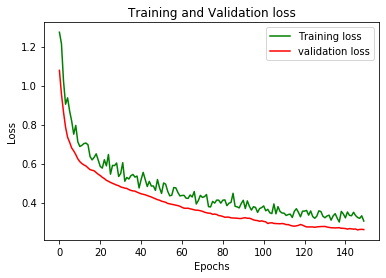

Check Learning Curve of Training and Validation Accuracy


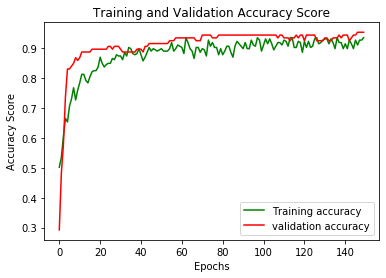

4/4 [==============================] - 0s 982us/step - loss: 0.2620 - accuracy: 0.9528
Check Confusion Matrix, Accuracy Score, Precision and Recall
True Positive: 72
True Negative: 29
False Positive: 2
False Negative: 3
accuracy: 95.28%
Hence, accuracy score is not that much valuable so let us see precision, recall and F1 Score metrics to have a good idea of model
precision: 97.30%
recall: 96.00%
F1 score conveys the balance between the precision and the recall
F1 Score = 96.64%


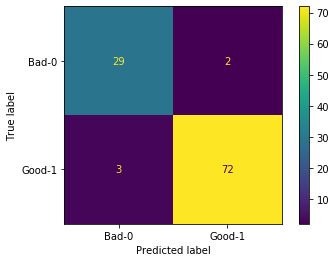

In [17]:
predict_evaluate_model(build_compile_model('relu','adam'),10,150)

*****************************
Activation Function = relu
Optimizer = rmsprop
Batch size = 10
Number of epochs = 150
*****************************
Check Learning Curve of Training and Validation Loss to determine underfitting, overfitting and bestfitting


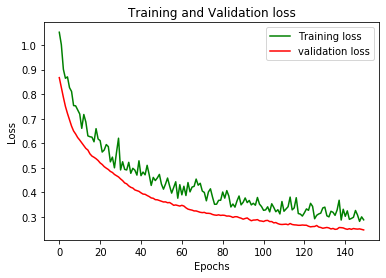

Check Learning Curve of Training and Validation Accuracy


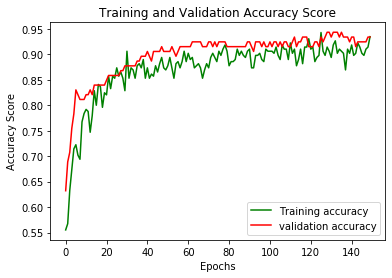

4/4 [==============================] - 0s 974us/step - loss: 0.2475 - accuracy: 0.9340
Check Confusion Matrix, Accuracy Score, Precision and Recall
True Positive: 73
True Negative: 26
False Positive: 5
False Negative: 2
accuracy: 93.40%
Hence, accuracy score is not that much valuable so let us see precision, recall and F1 Score metrics to have a good idea of model
precision: 93.59%
recall: 97.33%
F1 score conveys the balance between the precision and the recall
F1 Score = 95.42%


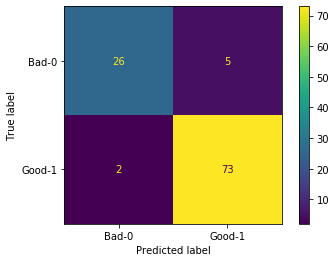

In [20]:
predict_evaluate_model(build_compile_model('relu','rmsprop'),10,150)